**Analyse des comportements de joueurs sur Steam (Jeux vidéo)**

*Exploration et nettoyage des données*

In [24]:
import pandas as pd

steam_description

In [25]:
steam_description = pd.read_csv("data/steam_description_data.csv")
steam_description.info()
print(steam_description.isnull().sum())
steam_description.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27334 non-null  int64 
 1   detailed_description  27334 non-null  object
 2   about_the_game        27334 non-null  object
 3   short_description     27334 non-null  object
dtypes: int64(1), object(3)
memory usage: 854.3+ KB
steam_appid             0
detailed_description    0
about_the_game          0
short_description       0
dtype: int64


,steam_appid,detailed_description,about_the_game,short_description
0,10,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...
1,20,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...
2,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...
3,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...
4,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...


steam_media

In [26]:
steam_media = pd.read_csv("data/steam_media_data.csv")
steam_media.info()
print(steam_media.isnull().sum())
steam_media.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27332 entries, 0 to 27331
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steam_appid   27332 non-null  int64 
 1   header_image  27332 non-null  object
 2   screenshots   27332 non-null  object
 3   background    27332 non-null  object
 4   movies        25641 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB
steam_appid        0
header_image       0
screenshots        0
background         0
movies          1691
dtype: int64


,steam_appid,header_image,screenshots,background,movies
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN


        - Ajout d'une colonne pour savoir si un jeux à au moins une vidéo associée
        - Parsage des screenshots et movies

In [27]:
import ast

# ---------- Ajouter la colonne 'hasMovie' ---------- 
steam_media['hasMovie'] = steam_media['movies'].notnull()

# ---------- Fonction plus adaptée pour des chaînes représentant des objets Python ---------- 
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return None

# ---------- Appliquer sur les colonnes concernées ---------- 
steam_media['movies'] = steam_media['movies'].apply(safe_literal_eval)
steam_media['screenshots'] = steam_media['screenshots'].apply(safe_literal_eval)

In [28]:
steam_media
#steam_media['screenshots'].iloc[0][0]['path_thumbnail']


,steam_appid,header_image,screenshots,background,movies,hasMovie
0,10,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,None,False
1,20,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,None,False
2,30,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,None,False
3,40,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,None,False
4,50,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,None,False
...,...,...,...,...,...,...
27327,1065230,https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 256747452, 'name': 'Video', 'thumbnail...",True
27328,1065570,https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 256747487, 'name': 'Game Trailer', 'th...",True
27329,1065650,https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 256747530, 'name': 'Gameplay Trailer',...",True
27330,1066700,https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 256747638, 'name': 'Main Trailer', 'th...",True


steam_requirements

In [29]:
steam_requirements = pd.read_csv("data/steam_requirements_data.csv")
steam_requirements.info()
print(steam_requirements.isnull().sum())
steam_requirements.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   steam_appid         27319 non-null  int64 
 1   pc_requirements     27319 non-null  object
 2   mac_requirements    27319 non-null  object
 3   linux_requirements  27319 non-null  object
 4   minimum             27314 non-null  object
 5   recommended         14134 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB
steam_appid               0
pc_requirements           0
mac_requirements          0
linux_requirements        0
minimum                   5
recommended           13185
dtype: int64


,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN


        Convertion des chaînes JSON-like en vrais dictionnaires
        Nettoyage du HTML (balises comme <p>, <strong>, etc.)

In [30]:
from bs4 import BeautifulSoup


# ---------- Convertir les chaînes JSON-like en vrais dictionnaires ----------
def safe_parse_dict(text):
    try:
        parsed = ast.literal_eval(text)
        if isinstance(parsed, dict):
            return parsed
        else:
            return {}  # Ignore si ce n'est pas un dict
    except (ValueError, SyntaxError):
        return {}

# ---------- Extraction sûre d'une clé dans un dict ----------
def extract_requirement_field(req, field='minimum'):
    if isinstance(req, dict):
        return req.get(field, None)
    return None

steam_requirements['pc_minimum'] = steam_requirements['pc_requirements'].apply(lambda x: extract_requirement_field(x, 'minimum'))
steam_requirements['pc_recommended'] = steam_requirements['pc_requirements'].apply(lambda x: extract_requirement_field(x, 'recommended'))

steam_requirements['mac_minimum'] = steam_requirements['mac_requirements'].apply(lambda x: extract_requirement_field(x, 'minimum'))
steam_requirements['mac_recommended'] = steam_requirements['mac_requirements'].apply(lambda x: extract_requirement_field(x, 'recommended'))

steam_requirements['linux_minimum'] = steam_requirements['linux_requirements'].apply(lambda x: extract_requirement_field(x, 'minimum'))
steam_requirements['linux_recommended'] = steam_requirements['linux_requirements'].apply(lambda x: extract_requirement_field(x, 'recommended'))

# ---------- Nettoyer le HTML ----------
def clean_html(text):
    if pd.isnull(text):
        return None
    return BeautifulSoup(text, "html.parser").get_text().strip()

for col in ['pc_minimum', 'pc_recommended', 'mac_minimum', 'mac_recommended', 'linux_minimum', 'linux_recommended']:
    steam_requirements[col] = steam_requirements[col].apply(clean_html)

# ---------- Nettoyer les colonnes "minimum" et "recommended" d'origine ----------
steam_requirements['minimum'] = steam_requirements['minimum'].apply(clean_html)
steam_requirements['recommended'] = steam_requirements['recommended'].apply(clean_html)

# ---------- Optionnel : Remplacer les valeurs manquantes par "Non fourni" ----------
steam_requirements.fillna({
    'minimum': 'Non fourni',
    'recommended': 'Non fourni',
    'pc_minimum': 'Non fourni',
    'pc_recommended': 'Non fourni',
    'mac_minimum': 'Non fourni',
    'mac_recommended': 'Non fourni',
    'linux_minimum': 'Non fourni',
    'linux_recommended': 'Non fourni',
}, inplace=True)

# ---------- Supprimer les colonnes originales inutiles ----------
steam_requirements.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements'], inplace=True)

steam_requirements.head()


,steam_appid,minimum,recommended,pc_minimum,pc_recommended,mac_minimum,mac_recommended,linux_minimum,linux_recommended
0,10,"500 mhz processor, 96mb ram, 16mb video card, ...",Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni
1,20,"500 mhz processor, 96mb ram, 16mb video card, ...",Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni
2,30,"500 mhz processor, 96mb ram, 16mb video card, ...",Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni
3,40,"500 mhz processor, 96mb ram, 16mb video card, ...",Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni
4,50,"500 mhz processor, 96mb ram, 16mb video card, ...",Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni,Non fourni


steam_support

In [31]:
steam_support = pd.read_csv("data/steam_support_info.csv")
steam_support.info()
print(steam_support.isnull().sum())
steam_support

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27136 entries, 0 to 27135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   steam_appid    27136 non-null  int64 
 1   website        18015 non-null  object
 2   support_url    16479 non-null  object
 3   support_email  23500 non-null  object
dtypes: int64(1), object(3)
memory usage: 848.1+ KB
steam_appid          0
website           9121
support_url      10657
support_email     3636
dtype: int64


,steam_appid,website,support_url,support_email
0,10,NaN,http://steamcommunity.com/app/10,NaN
1,30,http://www.dayofdefeat.com/,NaN,NaN
2,50,NaN,https://help.steampowered.com,NaN
3,70,http://www.half-life.com/,http://steamcommunity.com/app/70,NaN
4,80,NaN,http://steamcommunity.com/app/80,NaN
...,...,...,...,...
27131,1065230,NaN,https://goldlogsh.wixsite.com/myapps,zhang_frank@hotmail.com
27132,1065570,NaN,NaN,piziroggg@gmail.com
27133,1065650,http://entwickler-x.de/super-star-blast,http://www.entwickler-x.de,mail@entwickler-x.de
27134,1066700,https://steamcommunity.com/groups/alawargames,http://www.alawar.com,steam@alawar.com


In [32]:
"""# 1. Vérifier les doublons
steam_support.drop_duplicates(inplace=True)

# 2. Nettoyage des emails et URLs (en option)
steam_support['support_email'] = steam_support['support_email'].str.lower()
steam_support['support_email'] = steam_support['support_email'].where(
    steam_support['support_email'].str.contains(r'^[\w\.-]+@[\w\.-]+\.\w{2,4}$', na=False)
)

# 3. Supprimer ou marquer les lignes trop incomplètes ?
steam_support['missing_info_count'] = steam_support.isnull().sum(axis=1)
# Exemple : supprimer les lignes où 3 colonnes sur 4 sont manquantes
steam_support_cleaned = steam_support[steam_support['missing_info_count'] < 3].drop(columns='missing_info_count')
"""

"# 1. Vérifier les doublons\nsteam_support.drop_duplicates(inplace=True)\n\n# 2. Nettoyage des emails et URLs (en option)\nsteam_support['support_email'] = steam_support['support_email'].str.lower()\nsteam_support['support_email'] = steam_support['support_email'].where(\n    steam_support['support_email'].str.contains(r'^[\\w\\.-]+@[\\w\\.-]+\\.\\w{2,4}$', na=False)\n)\n\n# 3. Supprimer ou marquer les lignes trop incomplètes ?\nsteam_support['missing_info_count'] = steam_support.isnull().sum(axis=1)\n# Exemple : supprimer les lignes où 3 colonnes sur 4 sont manquantes\nsteam_support_cleaned = steam_support[steam_support['missing_info_count'] < 3].drop(columns='missing_info_count')\n"

steam

In [33]:
steam = pd.read_csv("data/steam.csv")
steam.info()
print(steam.isnull().sum())
steam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


            * appid - Steam Application ID.
            * name - game's name
            * developer - list of the developers of the game
            * publisher - list of the publishers of the game
            * score_rank - score rank of the game based on user reviews
            * owners - owners of this application on Steam as a range.
            * average_forever - average playtime since March 2009. In minutes.
            * average_2weeks - average playtime in the last two weeks. In minutes.
            * median_forever - median playtime since March 2009. In minutes.
            * median_2weeks - median playtime in the last two weeks. In minutes.
            * ccu - peak CCU yesterday.
            * price - current US price in cents.
            * initialprice - original US price in cents.
            * discount - current discount in percents.
            * tags - game's tags with votes in JSON array.
            * languages - list of supported languages.
            * genre - list of genres.

In [34]:
# 1. Nettoyer les valeurs manquantes
steam['developer'].fillna('Unknown', inplace=True)
steam['publisher'].fillna('Unknown', inplace=True)

# 2. Convertir la date
steam['release_date'] = pd.to_datetime(steam['release_date'], errors='coerce')

# 3. Séparer les champs multi-valeurs
steam['platforms'] = steam['platforms'].str.split(';')
steam['genres'] = steam['genres'].str.split(';')
steam['categories'] = steam['categories'].str.split(';')
steam['steamspy_tags'] = steam['steamspy_tags'].str.split(';')

# 4. Transformer les owners
steam[['owners_min', 'owners_max']] = steam['owners'].str.replace(',', '').str.split('-', expand=True).astype(int)

# 5. Convertir les booléens
steam['english'] = steam['english'].astype(bool)
steam.head()

# ---------- Rennomage de colonne ----------
steam = steam.rename(columns={'appid': 'steam_appid'})

C:\Users\Corentin\AppData\Local\Temp\ipykernel_7612\59015404.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steam['developer'].fillna('Unknown', inplace=True)
C:\Users\Corentin\AppData\Local\Temp\ipykernel_7612\59015404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

tags

In [35]:
tags = pd.read_csv("data/steamspy_tag_data.csv")
tags.info()
print(tags.isnull().sum())
tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Columns: 372 entries, appid to e_sports
dtypes: int64(372)
memory usage: 82.4 MB
appid           0
1980s           0
1990s           0
2.5d            0
2d              0
               ..
world_war_i     0
world_war_ii    0
wrestling       0
zombies         0
e_sports        0
Length: 372, dtype: int64


,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Vérification colonne toujours à 0 :
low_variance = tags.loc[:, tags.nunique() <= 1]
print("Colonnes constantes :", low_variance.columns.tolist())

# ---------- Rennomage de colonne ----------
tags = tags.rename(columns={'appid': 'steam_appid'})

Colonnes constantes : []


        Pas de nettoyage nécessaire

Jointure de toutes les données

In [37]:
df_merged = steam.copy()
df_merged = pd.merge(df_merged, steam_description, on='steam_appid', how='left')
df_merged = pd.merge(df_merged, steam_media, on='steam_appid', how='left')
df_merged = pd.merge(df_merged, steam_requirements, on='steam_appid', how='left')
df_merged = pd.merge(df_merged, steam_support, on='steam_appid', how='left')
df_merged = pd.merge(df_merged, tags, on='steam_appid', how='left')

In [38]:
df_merged.info()
print(df_merged.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Columns: 410 entries, steam_appid to e_sports
dtypes: bool(2), datetime64[ns](1), float64(1), int32(2), int64(378), object(26)
memory usage: 84.1+ MB
Index(['steam_appid', 'name', 'release_date', 'english', 'developer',
       'publisher', 'platforms', 'required_age', 'categories', 'genres',
       ...
       'warhammer_40k', 'web_publishing', 'werewolves', 'western', 'word_game',
       'world_war_i', 'world_war_ii', 'wrestling', 'zombies', 'e_sports'],
      dtype='object', length=410)


*Analyse exploratoire*

In [39]:
df_merged.shape
df_merged.info()
df_merged.isnull().mean().sort_values(ascending=False) # pour repérer les colonnes les + incomplètes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Columns: 410 entries, steam_appid to e_sports
dtypes: bool(2), datetime64[ns](1), float64(1), int32(2), int64(378), object(26)
memory usage: 84.1+ MB


support_url           0.396343
website               0.339206
support_email         0.140462
movies                0.062124
pc_minimum            0.000480
                        ...   
dystopian_            0.000000
dynamic_narration     0.000000
dungeons_&_dragons    0.000000
dungeon_crawler       0.000000
e_sports              0.000000
Length: 410, dtype: float64

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [41]:
df = df_merged.copy()

# Aperçu
df.shape
df.head()
df.info()
df.isnull().mean().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Columns: 410 entries, steam_appid to e_sports
dtypes: bool(2), datetime64[ns](1), float64(1), int32(2), int64(378), object(26)
memory usage: 84.1+ MB


support_url          0.396343
website              0.339206
support_email        0.140462
movies               0.062124
pc_minimum           0.000480
mac_recommended      0.000480
pc_recommended       0.000480
linux_minimum        0.000480
recommended          0.000480
minimum              0.000480
linux_recommended    0.000480
mac_minimum          0.000480
political            0.000000
platformer           0.000000
party_based_rpg      0.000000
perma_death          0.000000
philisophical        0.000000
photo_editing        0.000000
physics              0.000000
pinball              0.000000
dtype: float64

Second nettoyage :

In [91]:
# Suppression des colonnes peu utiles
cols_to_drop = ['support_url', 'support_email', 'website', 'movies']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Conversion de la date de sortie
df['release_year'] = df['release_date'].dt.year

# Création de features utiles
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df['rating_ratio'] = df['positive_ratings'] / df['total_ratings'].replace(0, np.nan)
df['log_price'] = np.log1p(df['price']) #?
df['desc_length'] = df['short_description'].str.len()
df['popular'] = (df['owners_max'] > 50000).astype(int)
df['price_range'] = pd.cut(df['price'], bins=[-0.01, 0, 5, 20, 60, 200, df['price'].max()], labels=['Free', '<5€', '5-20€', '20-60€', '60-200€', "<"+str(df['price'].max())+"€"])


In [43]:
df['positive_ratings']

0        124534
1          3318
2          3416
3          1273
4          5250
          ...  
27070         3
27071         8
27072         0
27073         2
27074         4
Name: positive_ratings, Length: 27075, dtype: int64

Analyse univariée

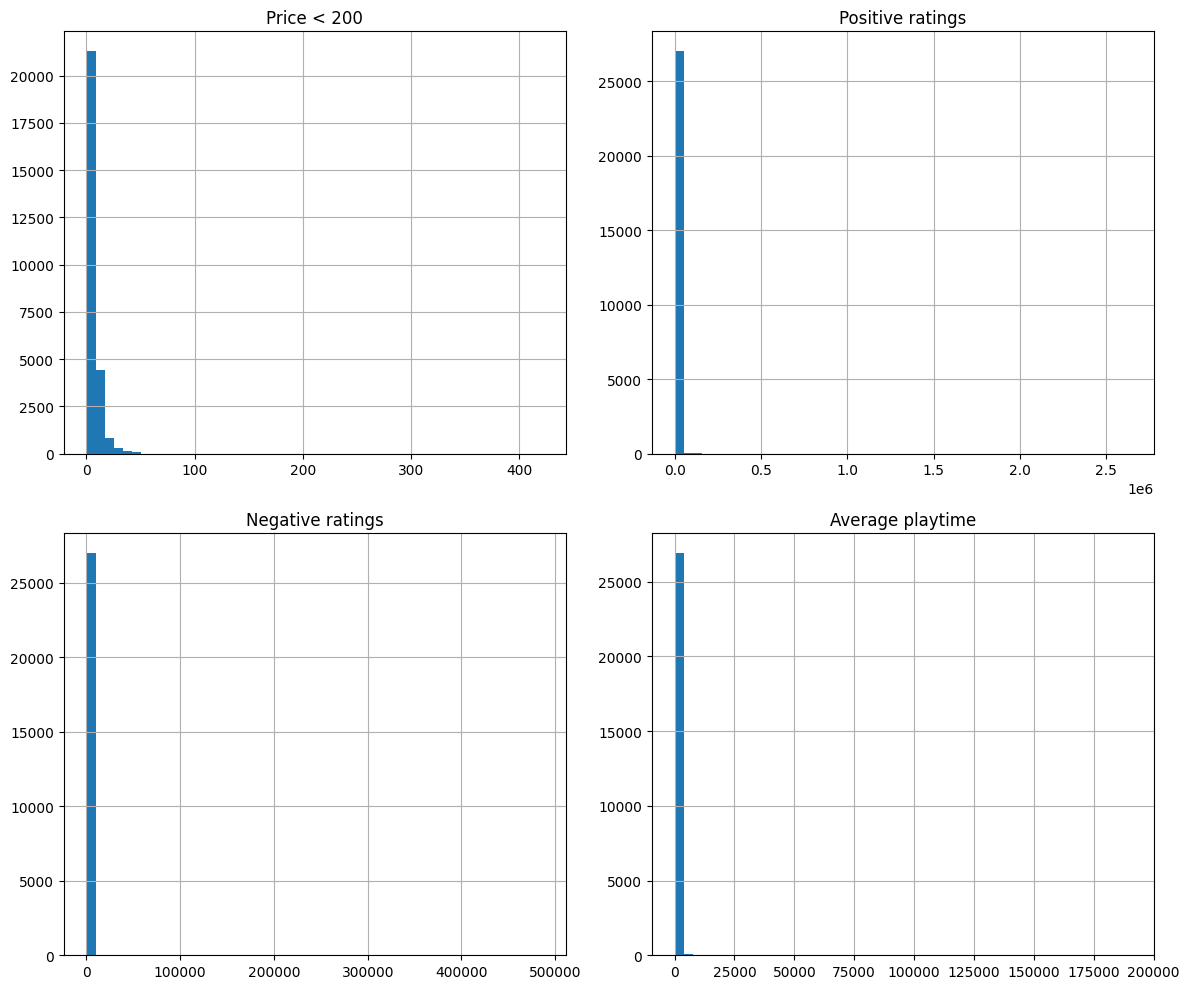

Text(0.5, 1.0, 'Nombre de jeux par année de sortie')

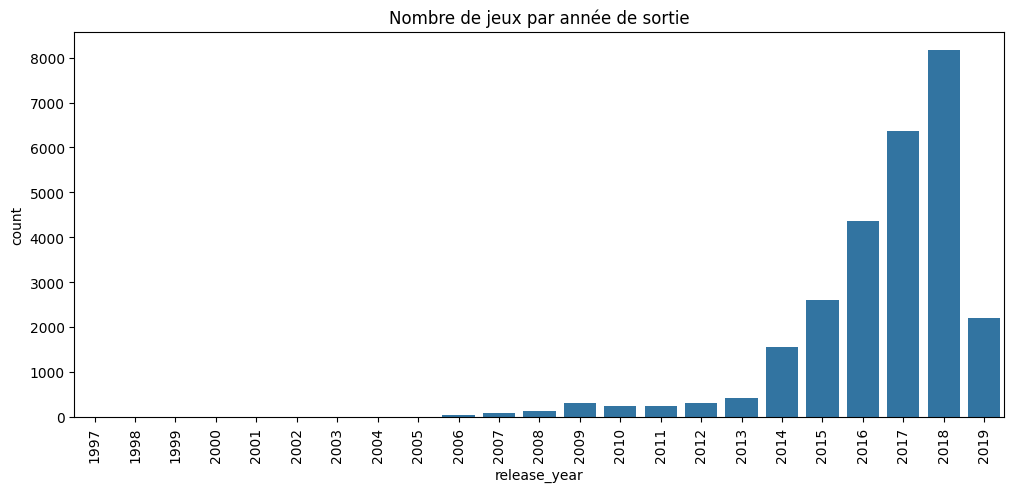

In [54]:
# Histogrammes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogramme price < 200
df['price'].hist(bins=50, ax=axes[0,0])
axes[0,0].set_title('Price < 200')

# Histograms pour les autres colonnes
df['positive_ratings'].hist(bins=50, ax=axes[0,1])
axes[0,1].set_title('Positive ratings')

df['negative_ratings'].hist(bins=50, ax=axes[1,0])
axes[1,0].set_title('Negative ratings')

df['average_playtime'].hist(bins=50, ax=axes[1,1])
axes[1,1].set_title('Average playtime')

plt.tight_layout()
plt.show()

# Distribution des années de sortie
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='release_year')
plt.xticks(rotation=90)
plt.title('Nombre de jeux par année de sortie')


On observe que pour le prix, le temps de jeu moyen et les évaluations, la grande majorité des jeux présentent des valeurs très faibles, tandis qu'une minorité — parfois seulement quelques titres — affichent des valeurs nettement plus élevées. Cette distribution fortement asymétrique mérite une exploration plus approfondie. Malgré cela, une tendance générale semble se dessiner en ce qui concerne les prix.

Concernant le nombre de jeux sortis par année, on observe une tendance globale à la hausse, avec une nette accélération à partir de 2014. La baisse apparente en 2019 peut s'expliquer par le fait que les données s’arrêtent en cours d’année.

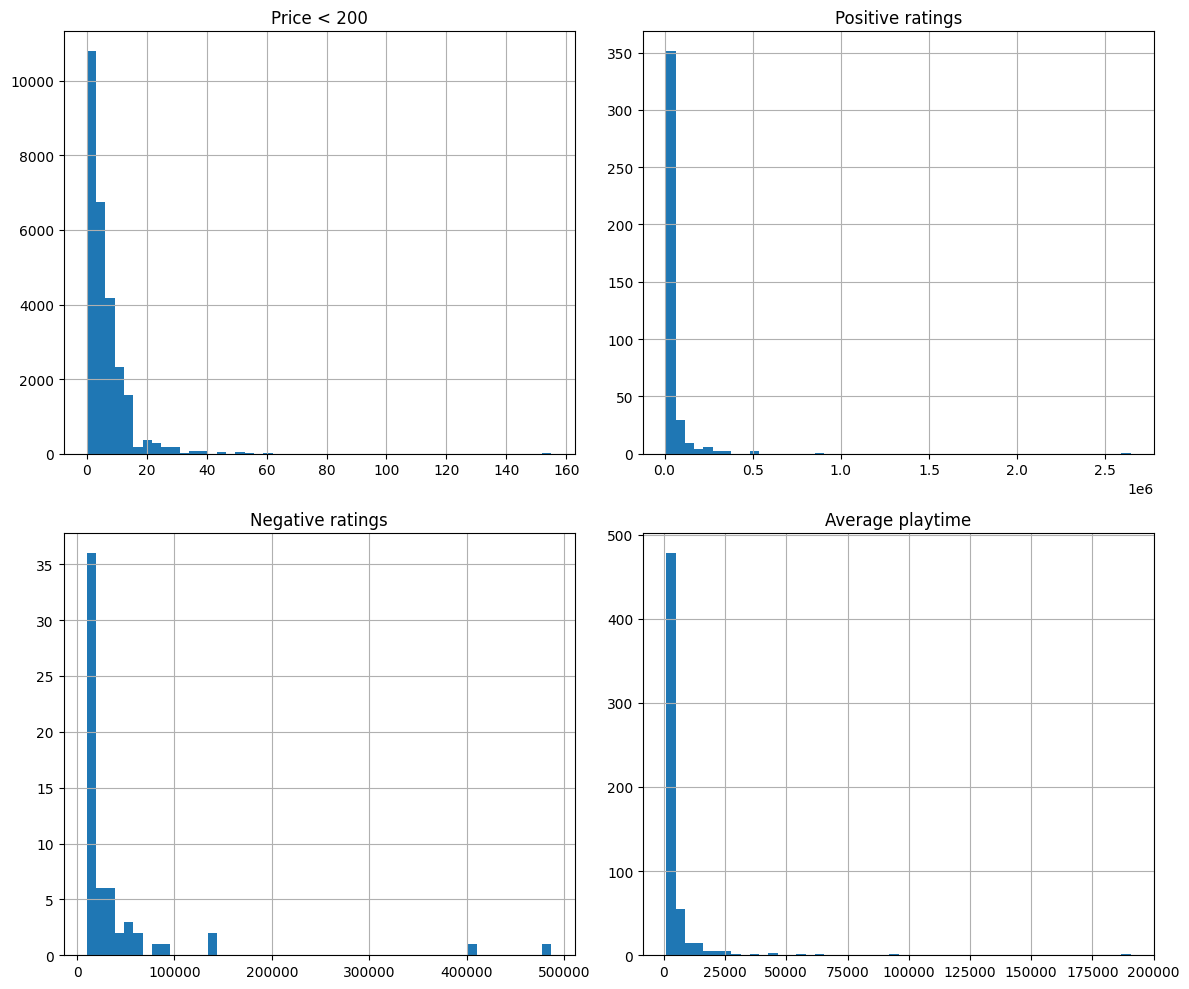

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogramme des prix < 200
df.loc[df['price'] < 200, 'price'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Price < 200')

# Histogramme des évaluations positives > 10
df.loc[df['positive_ratings'] > 10000, 'positive_ratings'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Positive ratings')

# Histogramme des évaluations négatives > 10
df.loc[df['negative_ratings'] > 10000, 'negative_ratings'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Negative ratings')

# Histogramme du temps de jeu moyen
df.loc[df['average_playtime'] > 1000, 'average_playtime'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Average playtime')

plt.tight_layout()
plt.show()


En fixant des seuils arbitraires et en ne regardant que les jeux à la fois chers, populaires et bien notés, on observe — comme on pouvait s'y attendre — que la majorité des jeux présentent des valeurs faibles sur ces critères, et que leur nombre décroît à mesure que ces valeurs augmentent.

Analyse bivariée

<Axes: >

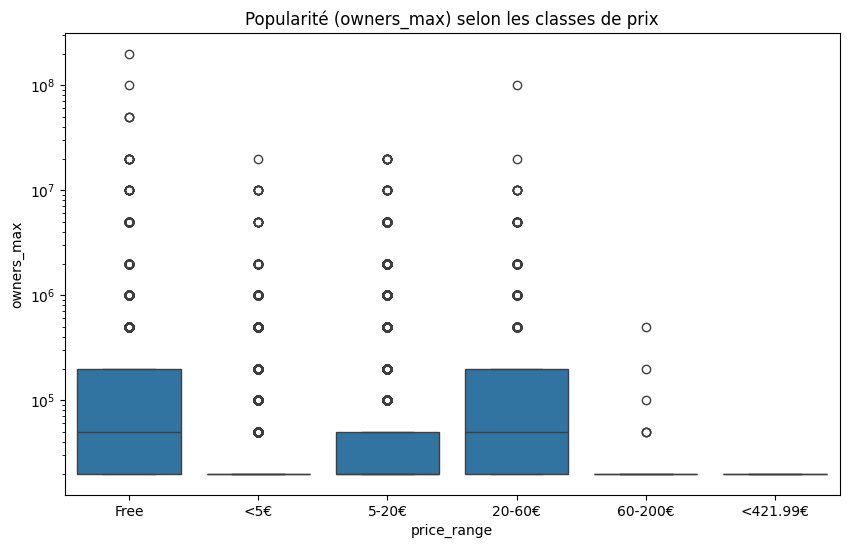

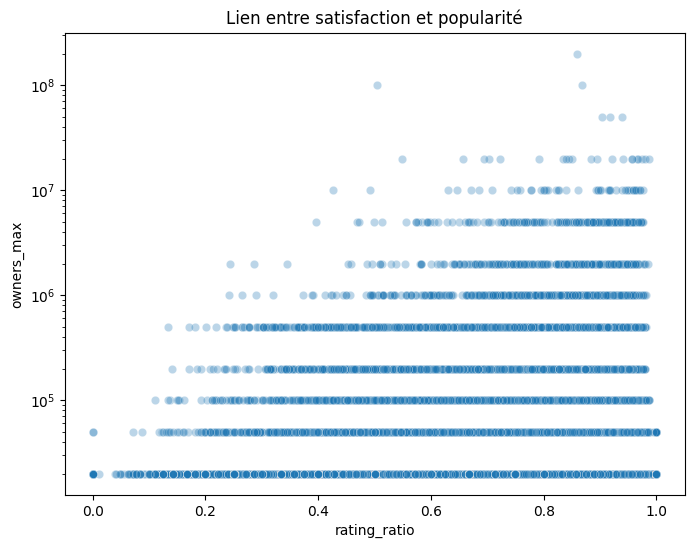

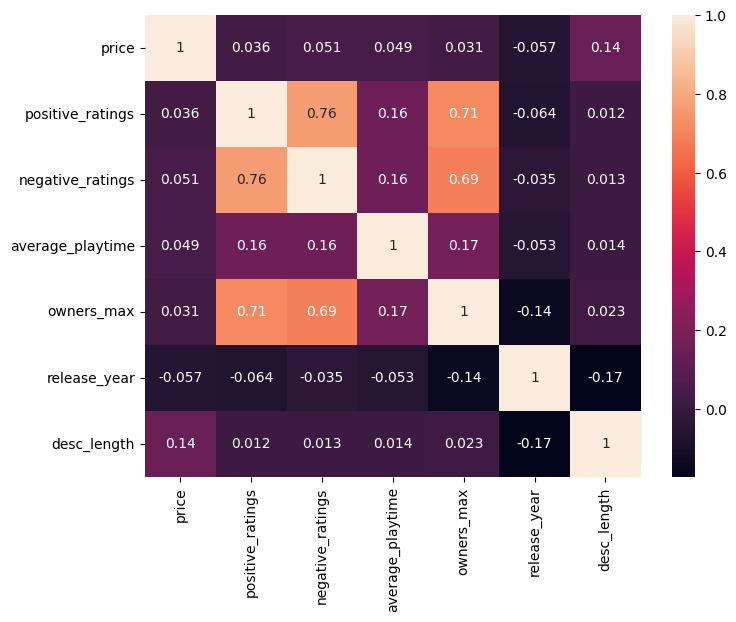

In [86]:
# Boxplot : prix vs popularité
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='price_range', y='owners_max')
plt.yscale('log')
plt.title("Popularité (owners_max) selon les classes de prix")

# Scatter : satisfaction vs popularité
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='rating_ratio', y='owners_max', alpha=0.3)
plt.yscale('log')
plt.title("Lien entre satisfaction et popularité")

# Corrélations
plt.figure(figsize=(8,6))
sns.heatmap(df[['price', 'positive_ratings', 'negative_ratings', 'average_playtime', 'owners_max', 'release_year', 'desc_length']].corr(), annot=True)

Boxplot
Dans un premier temps, en analysant la popularité en fonction des classes de prix, on remarque plusieurs phénomènes :

- Tout d’abord, deux classes se démarquent positivement : les jeux gratuits et ceux situés entre 20 et 60 €. Cela peut s’expliquer par le fait que les jeux gratuits sont évidemment plus accessibles, ce qui favorise un large nombre de téléchargements. Quant aux jeux entre 20 et 60 €, il s’agit souvent de titres phares ou de blockbusters bénéficiant d’une forte visibilité et d’une base de joueurs fidèle.

- On observe également que les jeux aux prix les plus bas (hors gratuité) restent assez populaires, probablement en raison de leur accessibilité financière et, comme mentionné précédemment, de leur plus grande abondance dans le catalogue.

- Enfin, on constate une popularité décroissante dans les classes de prix les plus élevées. Cela s’explique par un nombre de jeux plus limité dans ces tranches, mais aussi potentiellement par un effet d’élitisme : des jeux très spécialisés, destinés à un public restreint, ce qui limite leur diffusion à grande échelle.

Scatterplot

- Dans un second temps, le lien entre satisfaction et popularité montre que les jeux les moins populaires présentent des ratios de satisfaction très dispersés, allant de très faibles à excellents.
    
- On observe une tendance générale : plus un jeu est populaire, meilleur est son ratio de satisfaction, avec une dispersion plus faible autour de scores élevés.
    
- Cependant, parmi les jeux les plus populaires, on remarque une légère baisse du ratio de satisfaction pour les trois titres les plus joués, ce qui suggère qu'une très large audience peut aussi s'accompagner de retours plus critiques ou variés.

Corrélations
Prix
    Corrélations très faibles (près de zéro) avec toutes les autres variables
    Cela signifie que le prix n’est un facteur très lié à aucune autre variable
    Légère corrélation positive avec la longueur de la description (0.14), peut-être que les jeux plus chers ont des descriptions un peu plus détaillées.

Notes positives et négatives
    Forte corrélation positive entre positive_ratings et negative_ratings (0.76).
        Logique : plus un jeu a d’avis, plus il a de positifs et de négatifs.
    Positive_ratings et owners_max sont également fortement corrélés (0.71).
        Plus un jeu est populaire, plus il reçoit d’avis positifs.
    Negative_ratings est aussi fortement corrélé avec owners_max (0.69).
        Même logique que pour les positifs : plus de joueurs, plus d’avis négatifs.

Temps de jeux moyen
    Corrélations faibles/modérées avec ratings et owners_max (~0.15-0.17).
    Cela suggère qu’un temps de jeu moyen plus long est légèrement associé à plus de joueurs et d’avis, mais l’effet est très faible.

 Popularité
    Fortement corrélé a la notation (positifs et négatifs) comme expliqué.
    Corrélation négative modérée avec release_year (-0.14) : les jeux plus anciens tendent à être plus populaires, ce qui peut s’expliquer par une plus longue période de diffusion.

Année
    Corrélations négatives faibles avec presque toutes les autres variables.
    Ce qui montre que les jeux récents ont en moyenne :
        Un peu moins de joueurs (owners_max),
        Moins d’avis (positifs et négatifs),
        Des descriptions moins longues,
        Temps de jeu moyen un peu plus faible.

longueur de la description
    Corrélations faibles avec tout

Synthèse:
    Popularité (owners_max) est surtout liée à la quantité d’avis (positifs et négatifs) et au temps d’existence du jeu (plus un jeu est ancien, plus il a de joueurs).
    Prix n’a quasiment aucune corrélation significative avec la popularité, les avis, ou le temps de jeu.
    Les jeux plus récents ont tendance à avoir moins de joueurs et des descriptions plus courtes.
    Le temps de jeu moyen influence peu la popularité ou les notes, mais il a une faible corrélation positive.

Analyse des tags

popular,0,1,diff
action,11.648303,87.854613,76.206310
multiplayer,0.890279,69.750554,68.860274
singleplayer,2.633480,60.790221,58.156742
open_world,0.491341,52.453506,51.962164
adventure,10.134380,59.162915,49.028535
free_to_play,1.141030,43.715867,42.574837
rpg,4.047010,39.158118,35.111108
first_person,0.602355,35.191144,34.588789
fps,0.479381,34.790406,34.311025
co_op,0.433849,34.653137,34.219288


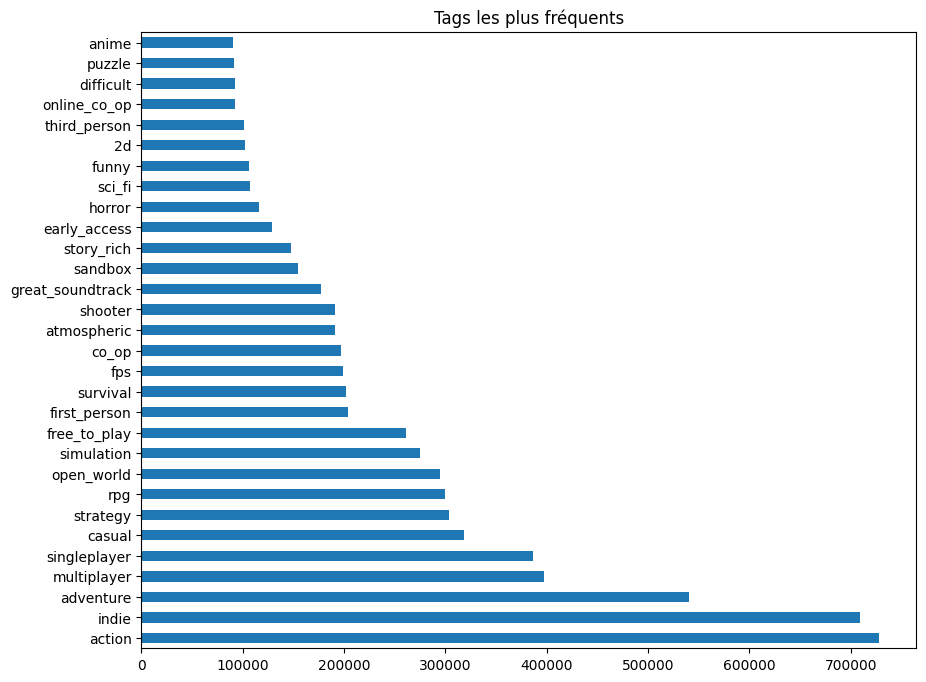

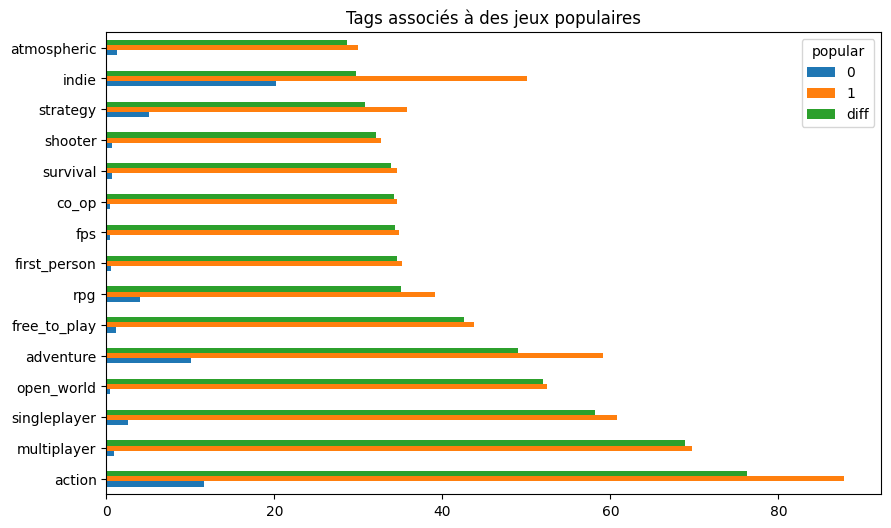

In [105]:
# Extraction des colonnes tags
tag_cols =  df.columns[35:405]

# Top tags utilisés
tag_sums = df[tag_cols].sum().sort_values(ascending=False).head(30)
tag_sums.plot(kind='barh', figsize=(10,8), title="Tags les plus fréquents")

# Tags favorables à la popularité
tag_success = df.groupby('popular')[tag_cols].mean().T
tag_success['diff'] = tag_success[1] - tag_success[0]
tag_success.sort_values('diff', ascending=False).head(15).plot(kind='barh', figsize=(10,6), title="Tags associés à des jeux populaires")
tag_success.sort_values('diff', ascending=False).head(15)


- Le tag action est le plus répandu (728 416 jeux) : cela signifie que parmi tous les jeux du dataset, environ 728 416 sont identifiés comme jeux d’action, ce qui en fait la catégorie la plus représentée.
- Les tags indie (709 652), adventure (540 123) et multiplayer (397 327) suivent de près. Cela indique que les jeux indépendants et d’aventure sont très nombreux, et que les jeux multijoueurs occupent également une place importante.
- Des tags comme singleplayer (386 511), casual (318 387) ou strategy (303 942) représentent d’autres grandes catégories très présentes dans le dataset.
- On note aussi la présence de tags plus spécifiques ou qualitatifs, tels que great_soundtrack (177 153) ou atmospheric (190 813), qui reflètent davantage des critères d’appréciation ou d’ambiance que des genres stricts.

Cependant il reste des points d’attention :

- Redondances et chevauchements : certains tags peuvent se recouper, par exemple shooter et fps, ou multiplayer et co_op, ce qui peut introduire des doublons dans l’analyse.
- Déséquilibre des tags : certains tags très fréquents peuvent masquer la présence de catégories plus spécifiques ou de niche.

Tags les plus associés à la popularité :

- action, multiplayer, singleplayer, open_world, adventure sont en tête : ce sont clairement des caractéristiques clés des jeux populaires.

- Par exemple, un jeu multijoueur ou avec un mode solo très marqué a plus de chances d’être populaire.

Interprétation générale :

- Les tags liés à l’action et à l’expérience de jeu immersive (open_world, fps, shooter) ont un impact fort.

- Les jeux qui mélangent des modes solo et multijoueur sont largement plus populaires.

- Même le tag free_to_play a une différence positive importante, ce qui montre que certains jeux gratuits sont aussi très populaires.

Limitations :

- Cette analyse montre une corrélation, pas une causalité. Le tag "action" ne cause pas la popularité, mais il est très fréquent dans les jeux populaires.

- Certains tags ont un poids élevé peut-être parce qu’ils sont plus répandus dans des genres très joués.